In [1]:
#Code cell 1
#Necessary packages

import matplotlib.pyplot as plt
import numpy as np
import random

#Given functions



def deg_to_kms(point_long, point_lat, origin_long, origin_lat):
    """
    Converts global coordinates of a point (point_lat, point_long) measured in degrees latitude and longitude 
    to local coordinates based at point (origin_long, origin_lat) measured in kilometers.
    """
    
    earth_radius = 6371.0

    # Convert longitudes and latitudes from degrees to radians
    long = point_long*pi/180
    reference_long = origin_long*pi/180
    lat = point_lat*pi/180
    reference_lat = origin_lat*pi/180

    # Calculate the difference in latitude and longitude in radians
    long_difference_rad =long - reference_long
    lat_difference_rad = lat - reference_lat
  
    # Calculate the signed distance using the Earth's meridian length formula
    diff_long = earth_radius * long_difference_rad * cos(reference_lat)
    diff_lat = earth_radius * lat_difference_rad
    
    
    return diff_long.n(), diff_lat.n()
    
def kms_to_deg(local_x, local_y, origin_long, origin_lat):
    """
    Converts local coordinates of a point (local_x, local_y) measured in kms from the point(origin_long, origin_lat) 
    into global coordinates measured in degrees latitude and longitude.
    """
    
    # Radius of the Earth in kilometers
    earth_radius = 6371.0

    # Convert origin longitude and latitude from degrees to radians
    reference_long = origin_long*pi/180
    reference_lat = origin_lat*pi/180

    # Calculate the difference in latitude in radians
    long_diff = local_x / (earth_radius * cos(reference_lat))
    lat_diff = local_y / earth_radius
    

    # Convert the latitude difference from radians to degrees
    long_diff_deg = long_diff*180/pi
    lat_diff_deg = lat_diff*180/pi
    
    #Add difference to origin angles
    long_deg = long_diff_deg + origin_long
    lat_deg = lat_diff_deg + origin_lat

    return [lat_deg.n(), long_deg.n()]


The coordinates for the system are: [(0.000000000000000, 0.000000000000000), (1.20220840214171, -1.30005327605324), (-1.69200563086119, 0.155982019198385), (-1.15445283070817, 1.07210478838143)]


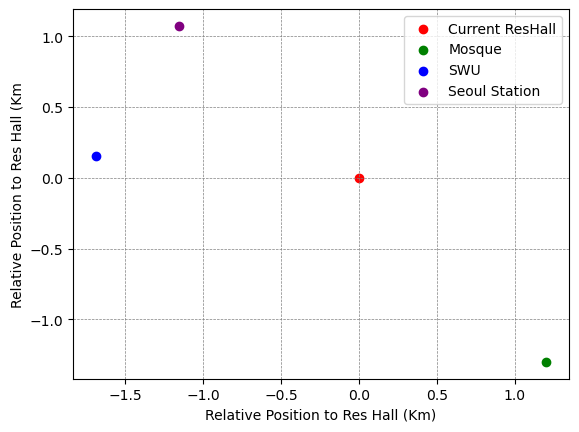

In [2]:
# Code cell 2 - Making the coordinate system

# Using the online calculator to obtain the position for all of our locations in decimal degrees for latitude, longitude:
pos_r=(37.54507222, 126.98388333) # Residence hall
pos_m=(37.53338056, 126.99751944) # Mosque
pos_swu=(37.54647500, 126.96469167) # SWU
pos_s=(37.55471389, 126.97078889) # Seoul Station

points=[pos_r, pos_m, pos_swu, pos_s]

# Plotting the points for our coordinate system with origin in the residence hall
coords=[deg_to_kms(point[1],point[0],pos_r[1],pos_r[0]) for point in points]

x,y=zip(*coords)
plt.scatter(x[0], y[0], color='red', label='Current ResHall')
plt.scatter(x[1], y[1], color='green', label='Mosque')
plt.scatter(x[2], y[2], color='blue', label='SWU')
plt.scatter(x[3], y[3], color='purple', label='Seoul Station')
plt.xlabel('Relative Position to Res Hall (Km)')
plt.ylabel('Relative Position to Res Hall (Km')
plt.legend()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)

print(f'The coordinates for the system are: {coords}')

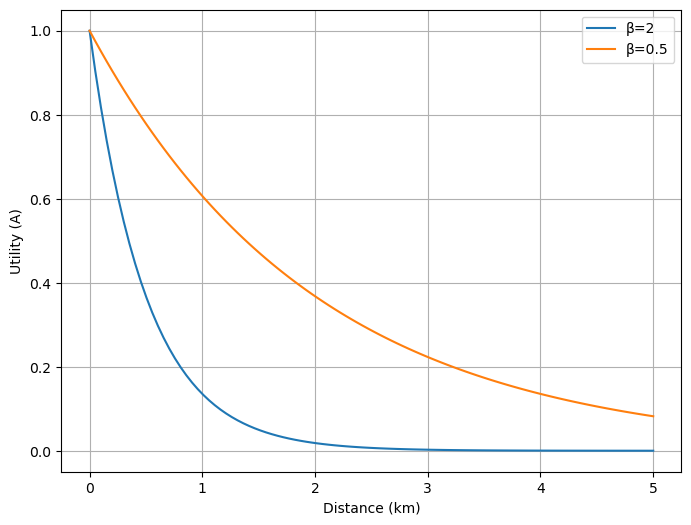

In [3]:
#Code cell 2.1 - Utilitiy functions beta=0.5 and beta=2

# Generate x values
x = np.linspace(0, 5, 100)  # Adjust the range and number of points as needed

y1 = np.exp(-2 * x)
y2 = np.exp(-0.5 * x)

# Create line plots
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="\u03B2=2")
plt.plot(x, y2, label="\u03B2=0.5")

# Add labels and title
plt.xlabel('Distance (km)')
plt.ylabel('Utility (A)')
#plt.title('Line Plots of tility functions when \u03B2=0.25 and \u03B2=2.0')
plt.legend()  # Display legend with function labels

# Show the plot
plt.grid(True)
plt.show()

In [4]:
# Code cell 3 - Utility function
var('x, y')

amenities=[pos_m, pos_swu, pos_s]
am_coords=[deg_to_kms(point[1],point[0], pos_r[1],pos_r[0]) for point in amenities]

# Weight of Mosque, SWU, and Seoul Station
weights=[0.085, 0.475, 0.28]

#Get the terms for all amenities (weight*distance decay function).
utilities=[weights[i]*e^(-sqrt((am_coords[i][0]-x)^2+(am_coords[i][1]-y)^2)) for i in range(len(am_coords))]

# Creating the function by adding up all terms
U(x,y)=sum(utilities)
print("U(x,y)=", U(x,y))

U(x,y)= 0.475000000000000*e^(-sqrt((x + 1.69200563086119)^2 + (y - 0.155982019198385)^2)) + 0.280000000000000*e^(-sqrt((x + 1.15445283070817)^2 + (y - 1.07210478838143)^2)) + 0.0850000000000000*e^(-sqrt((x - 1.20220840214171)^2 + (y + 1.30005327605324)^2))


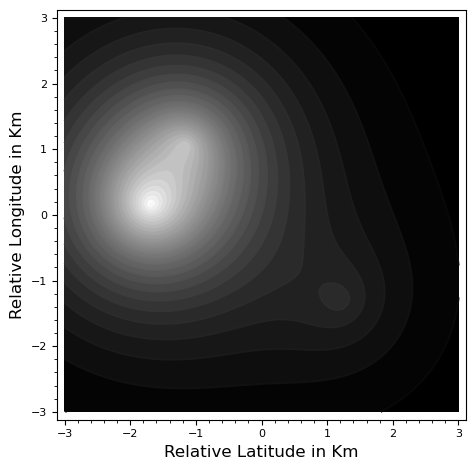

In [5]:
#Code Cell 4 - Utility contour plot
contour_plot(U(x,y),(x,-3,3),(y,-3,3), axes_labels=['Relative Latitude in Km', 'Relative Longitude in Km'], fontsize=8, contours=30)

In [6]:
#Code Cell 5 - Three-dimensional plot

three_plot= plot3d(10*U(x,y), (x, -3,3), (y, -3, 3), color='blue') 
#We are multiplying the Utility function by 10
# to improve the visualization. Utility ranges from ~0.6 to ~0.0. Using the original function is hard to see. 

# Display the 3D plot using the threejs viewer in a web browser
show(three_plot,viewer='threejs')

Graphics3d Object

In [7]:
#Code cell 6 - Partial derivatives

gradU=U.gradient() # First order partial derivatives

dUdx(x,y)=gradU[0]
dUdy(x,y)=gradU[1]

print(simplify(dUdx(x,y)))
print(simplify(dUdy(x,y)))

-(0.475*x + 0.8037026746590642)*e^(-sqrt((x + 1.692005630861188)^2 + (y - 0.1559820191983854)^2))/sqrt((x + 1.692005630861188)^2 + (y - 0.1559820191983854)^2) - (0.28*x + 0.32324679259828665)*e^(-sqrt((x + 1.154452830708167)^2 + (y - 1.072104788381431)^2))/sqrt((x + 1.154452830708167)^2 + (y - 1.072104788381431)^2) - (0.085*x - 0.10218771418204578)*e^(-sqrt((x - 1.202208402141715)^2 + (y + 1.300053276053244)^2))/sqrt((x - 1.202208402141715)^2 + (y + 1.300053276053244)^2)
-(0.475*y - 0.07409145911923304)*e^(-sqrt((x + 1.692005630861188)^2 + (y - 0.1559820191983854)^2))/sqrt((x + 1.692005630861188)^2 + (y - 0.1559820191983854)^2) - (0.28*y - 0.3001893407468006)*e^(-sqrt((x + 1.154452830708167)^2 + (y - 1.072104788381431)^2))/sqrt((x + 1.154452830708167)^2 + (y - 1.072104788381431)^2) - (0.085*y + 0.11050452846452574)*e^(-sqrt((x - 1.202208402141715)^2 + (y + 1.300053276053244)^2))/sqrt((x - 1.202208402141715)^2 + (y + 1.300053276053244)^2)


0.0535654799642751


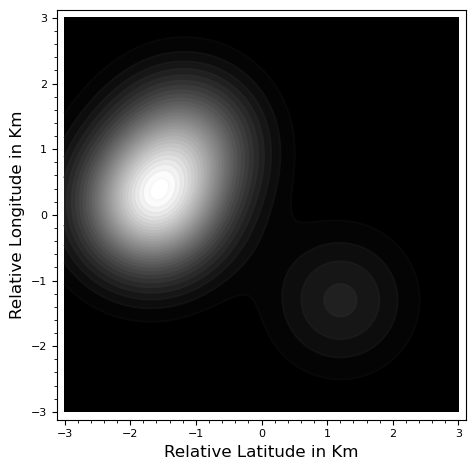

In [8]:
#Code cell 7 - Manipulating objective function
amenities=[pos_m, pos_swu, pos_s]
am_coords=[deg_to_kms(point[1],point[0], pos_r[1],pos_r[0]) for point in amenities]
#print(am_coords)
# Weight of Mosque, SWU, and Seoul Station
weights=[0.085, 0.475, 0.28]

#Get the terms for all amenities (weight*distance decay function).
utilities_prime=[weights[i]*e^(-((am_coords[i][0]-x)^2+(am_coords[i][1]-y)^2)) for i in range(len(am_coords))]

# Creating the function by adding up all terms
U_prime(x,y)=sum(utilities_prime)
#print(U_prime(x,y))
#U_prime(0,0)
print(U_prime(-0,0))
p1= contour_plot(U_prime(x,y), (x, -3, 3), (y, -3, 3), axes_labels=['Relative Latitude in Km', 'Relative Longitude in Km'], fontsize=8, contours=30)
show(p1)

In [9]:
#Code cell 8 - System of equations. No solutions
try:
    print(solve(dUdx(x,y)==0,dUdy(x,y)==0, x,y))
except TypeError:
    print ("Sagemath could not solve this. \nTypeError: ECL says: algsys: Couldn't reduce system to a polynomial in one variable.")
except:
    print('Something else went wrong')

Sagemath could not solve this. 
TypeError: ECL says: algsys: Couldn't reduce system to a polynomial in one variable.


In [10]:
#Code cell 9 - Gradient Ascent for U(x,y)

# Set a seed for reproducibility
seed_value = int(38)
random.seed(seed_value)

# Generate random x and y coordinates in the range from -3 to 3
x_init = random.uniform(-3, 3)
y_init = random.uniform(-3, 3) #random initial coordinates

alpha_init = 5 #-> step size of 5

Udx,Udy=U.gradient()[0], U.gradient()[1] #-> Gradient

x_current = x_init #initial coordinate x
y_current = y_init #initial coordinate y
alpha = alpha_init #stepsize
N=300 #number of steps

# Initialize a list to store the objective values at each iteration.
objective_values = []
steps=[]

# Main optimization loop.
for iteration in range(N):
    # Compute the gradient of the objective function at the current solution.
    gradient_x = Udx(x=x_current,y=y_current)
    gradient_y= Udy(x=x_current,y=y_current)
    
    # Update the solution using the gradient and the step size.
    x_current += alpha * gradient_x
    y_current += alpha * gradient_y
    
    #Update the learning step
    alpha=alpha*0.9

    # Evaluate the objective function at the new solution.
    obj_value_new = U(x=x_current, y=y_current)

    # Store the utility value and other data
    
    steps.append((x_current,y_current)) #store (x,y) as tuples
    objective_values.append(obj_value_new.n())

#Final values
print(f'The coordinates are {steps[-1]}, and the utility value is {objective_values[-1]}')


The coordinates are (-1.69200563086117, 0.155982019198414), and the utility value is 0.575125068411513


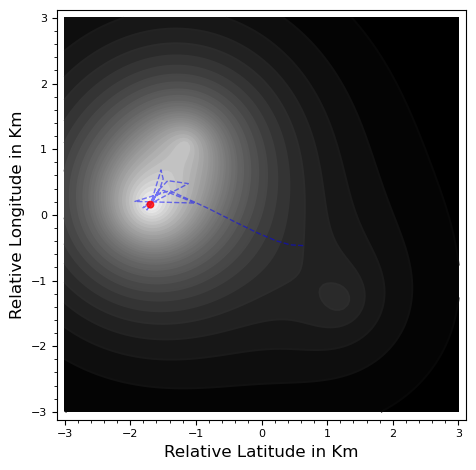

In [11]:
#Code cell 10 - Gradient Ascent path in the contour plot
C1 = contour_plot(U(x,y),(x,-3,3),(y,-3,3), axes_labels=['Relative Latitude in Km', 'Relative Longitude in Km'], fontsize=8, contours=30)
L1 = line(steps, linestyle='--', alpha=0.5)
P1 = circle(steps[-1],.05, color='red', fill=True, alpha=0.8)
show(C1+L1+P1)

In [12]:
# Code Cell 11 - Converting the Global Maximum back to degrees
maximum_utility=U(x_current, y_current)
global_maxima = kms_to_deg(x_current, y_current, 126.98388333, 37.54507222)
print('Relative position of Global Maxima:', x_current, y_current)
print('Position of Global Maxima in degrees:', global_maxima)

Relative position of Global Maxima: -1.69200563086117 0.155982019198414
Position of Global Maxima in degrees: [37.5464750000000, 126.964691670000]


In [13]:
# Code cell 12 - Defining the Constraint

# Using the online calculator to obtain the position for all of our locations in decimal degrees for latitude, longitude:
pos_r=(37.54507222, 126.98388333) # Residence hall
pos_m=(37.53338056, 126.99751944) # Mosque
pos_swu=(37.54647500, 126.96469167) # SWU
pos_s=(37.55471389, 126.97078889) # Seoul Station
start_point = (37.53583333, 126.97277778) # Constraint start point
end_point = (37.55555556, 126.97305556) # Constraint end point

points=[pos_r, pos_m, pos_swu, pos_s, start_point, end_point]

# Plotting the points for our coordinate system with origin in the residence hall
coords=[deg_to_kms(point[1],point[0],pos_r[1],pos_r[0]) for point in points]

# Inspecting the coordinates
print(f'The constraint inital and endpoints are {coords[-2]} and {coords[-1]}')

long,lat=zip(*coords)

# Find the constraint equation
slope = (lat[5] - lat[4])/(long[5] - long[4])
b = lat[4] - slope * long[4]
C(x) = slope*x + b

print('The constraint function is: \ny=', C(x))

The constraint inital and endpoints are (-0.979105149518184, -1.02731769582667) and (-0.954615067673043, 1.16569422228989)
The constraint function is: 
y= 89.5469411651490*x + 86.6485535225726


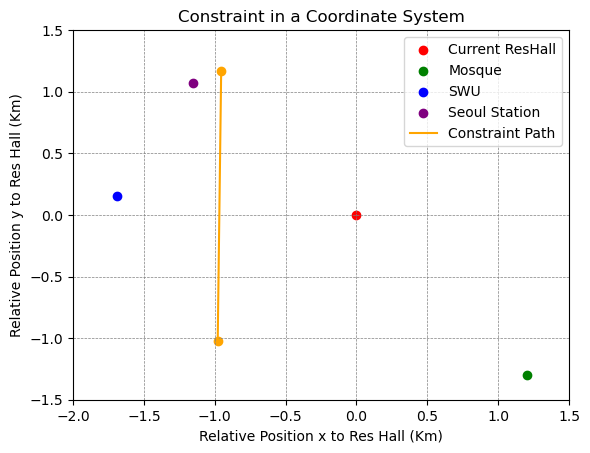

In [14]:
#Code cell 13 - Plotting the constraint
plt.scatter(long[0], lat[0], color='red', label='Current ResHall')
plt.scatter(long[1], lat[1], color='green', label='Mosque')
plt.scatter(long[2], lat[2], color='blue', label='SWU')
plt.scatter(long[3], lat[3], color='purple', label='Seoul Station')
plt.scatter(long[4], lat[4], color='orange')
plt.scatter(long[5], lat[5], color='orange')
plt.plot([long[4], long[5]], [lat[4], lat[5]], color='orange', label='Constraint Path')
plt.xlim(-2, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Constraint in a Coordinate System')
plt.xlabel('Relative Position x to Res Hall (Km)')
plt.ylabel('Relative Position y to Res Hall (Km)')
plt.legend()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

In [15]:
#Code cell 14 - Defining the single variable utility function
U_const(x)=U(x=x,y=C(x))
print(f'Our single variable objective function is: \n{U_const(x)}\n')


Our single variable objective function is: 
0.0850000000000000*e^(-sqrt((89.5469411651490*x + 87.9486067986258)^2 + (x - 1.20220840214171)^2)) + 0.475000000000000*e^(-sqrt((89.5469411651490*x + 86.4925715033742)^2 + (x + 1.69200563086119)^2)) + 0.280000000000000*e^(-sqrt((89.5469411651490*x + 85.5764487341911)^2 + (x + 1.15445283070817)^2))



In [16]:
#Code cell 15 - Finding the critical point. No solution
try:
    dU_const=U_const(x).diff(x)
    simplify(dU_const)
    solution=solve(dU_const==0,x)
    print(solution.n())
    print(solution)
except AttributeError:
    print("Sagemath did not solve this exactly. \nAttributeError: 'Sequence_generic' object has no attribute 'n'")
except:
    print("Something else went wrong")

Sagemath did not solve this exactly. 
AttributeError: 'Sequence_generic' object has no attribute 'n'


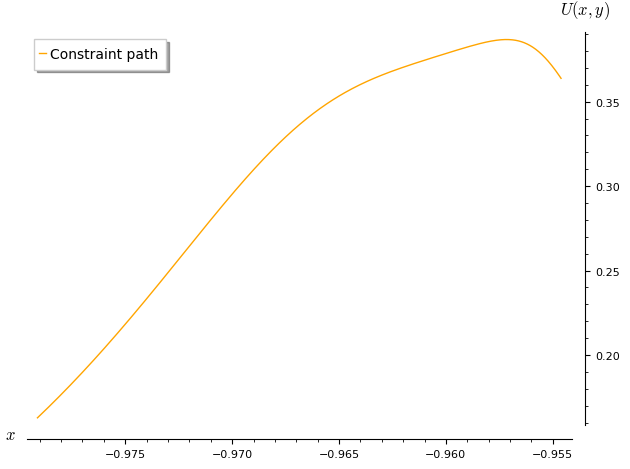

In [17]:
#Code cell 16 - Plot of constrained utility
final_const=coords[-1] #endpoint of the constraint
init_const=coords[-2] #endpoint of the constraint
p = plot(U_const(x),init_const[0],final_const[0], axes_labels=['$x$', '$U(x,y)$'], fontsize=8, legend_label='Constraint path', color='orange')
p.show()

In [18]:
#code cell 17 - Gradient Ascent II

# Set a seed for reproducibility
seed_value = int(38)
random.seed(seed_value)

# Generate random x
x_0 = random.uniform(init_const[0], final_const[0]) #initial point


alpha_init = .05 #-> step size of .05

dU_const(x)=U_const.diff(x)

x_current = x_0 #initial coordinate x

alpha = alpha_init #stepsize
N=300 #number of steps

# Initialize a list to store the objective values at each iteration.
objective_values = []
steps=[]

# Main optimization loop.
for iteration in range(N):
    # Compute the gradient of the objective function at the current solution.
    gradient_x = dU_const(x=x_current)*0.1 #Scale by factor of 0.1
    
    # Update the solution using the gradient and the step size.
    x_current += alpha * gradient_x


    # Evaluate the objective function at the new solution.
    obj_value_new = U_const(x=x_current)

    # Store the objective value for analysis or convergence checking.
    
    steps.append(x_current)
    objective_values.append(obj_value_new.n())

    alpha=alpha*0.9

x_max=steps[-1]
u_max=objective_values[-1]
print(f'The algorithm located the point x= {x_max}\nThe utility is: {u_max}')


The algorithm located the point x= -0.957164834541096
The utility is: 0.386789279125903


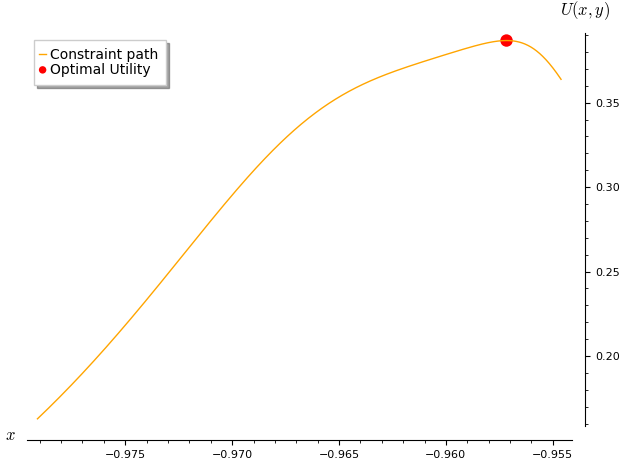

In [19]:
#Code cell 18 - Constrained utility with maximum plot
P1=plot(U_const(x),init_const[0],final_const[0], axes_labels=['$x$', '$U(x,y)$'], fontsize=8, legend_label='Constraint path', color='orange')
P2=point([(x_max,u_max)], marker='o', size=80, color='red', alpha=1, legend_label='Optimal Utility')


show(P1+P2, legend_options={'loc': 'upper left'})

In [20]:
#Code cell 19 - location of x and y
y_max=slope*x_max+b
print(f'The coordinates in relative km are: {(x_max,y_max)}')
###ADD HERE THE TRANSFORMATION TO COORDINATES

The coordinates in relative km are: (-0.957164834541096, 0.937370398571517)


In [21]:
# Code Cell 20 - Converting the Maximum within constraint back to degrees
maximum_constrained=U(x_max, y_max)
constrained_maxima = kms_to_deg(x_max, y_max, 126.98388333, 37.54507222)
print('Relative position of Constrained Maxima:', x_max, y_max)
print('Position of Constrained Maxima in degrees:', constrained_maxima)

Relative position of Constrained Maxima: -0.957164834541096 0.937370398571517
Position of Constrained Maxima in degrees: [37.5535021945218, 126.973026639140]


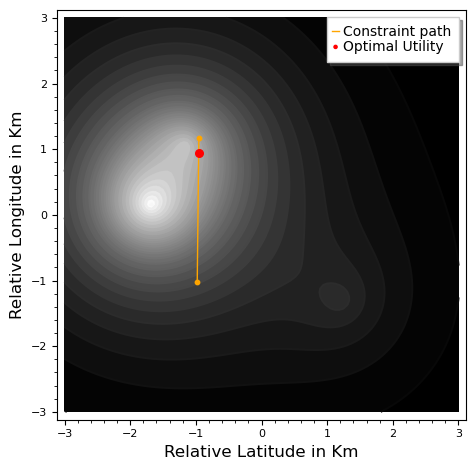

In [22]:
#Code cell 21 - Contour plot with the critical point and proposed location
p1 = contour_plot(U(x,y), (x, -3, 3), (y, -3, 3), axes_labels=['Relative Latitude in Km', 'Relative Longitude in Km'], fontsize=8, contours=30)
line_tuple=coords[-2:]
p2 = line(line_tuple, color='orange', legend_label='Constraint path')
p3=scatter_plot(line_tuple, edgecolor='orange',facecolor='orange',markersize=10)
p4=scatter_plot([(x_max,y_max)],edgecolor='red',facecolor='red',markersize=30)
p5=point([(x_max,y_max)],rgbcolor='red',size=30, legend_label='Optimal Utility') # Include a label for the point

show(p1+p2+p3+p4+p5)